In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from IPython.display import Image
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Book-test.csv")

In [3]:
# display the first rows in the data
data.head()

,Technical Skills,Academic Performance,Programming Skills,Projects,Internships,Backlog,Placed
0,90,75,90,80,80,0,1
1,85,70,80,70,75,0,1
2,90,78,88,85,80,0,1
3,90,60,80,70,0,0,0
4,80,88,85,90,80,0,1


In [4]:
# check for null values
data.isnull().sum()

Technical Skills        0
Academic Performance    0
Programming Skills      0
Projects                0
Internships             0
Backlog                 0
 Placed                 0
dtype: int64

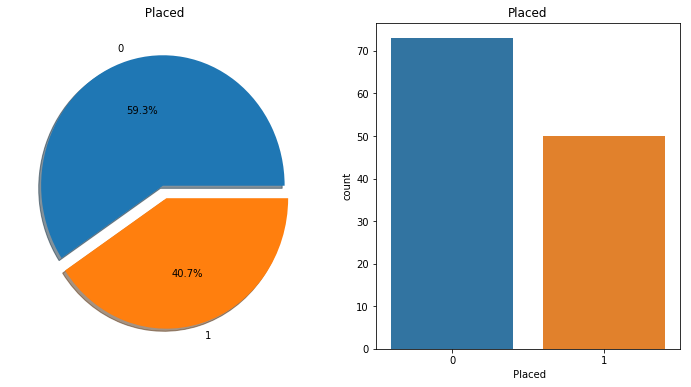

In [5]:
f,ax=plt.subplots(1,2,figsize=(12,6))
data[' Placed'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title(' Placed')
ax[0].set_ylabel('')
sns.countplot(' Placed',data=data,ax=ax[1])
ax[1].set_title('Placed')
plt.show()

In [6]:
data = pd.get_dummies(data)
data.head()

,Technical Skills,Academic Performance,Programming Skills,Projects,Internships,Backlog,Placed
0,90,75,90,80,80,0,1
1,85,70,80,70,75,0,1
2,90,78,88,85,80,0,1
3,90,60,80,70,0,0,0
4,80,88,85,90,80,0,1


In [7]:
# Preparing training data and evaluation data\
from sklearn.model_selection import train_test_split
Y=data[' Placed'].values
X=data.drop(' Placed',axis=1).values
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=21)

In [8]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True)
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [10]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.84


In [11]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [12]:
#Predict the response for test dataset
y_pred = knn.predict(x_test)

In [13]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.88


In [14]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(x_test)

In [15]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.84


In [16]:
import os
import PyPDF2
import re
import statistics
from nltk.tokenize import sent_tokenize,word_tokenize
from statistics import mean 
def extract(l2):
    ResSearch=[]
    l=[]
    l1=[]
    skills=[]
    ratings=[]
    backlogs=0
    cgpa=0
    experience=[]
    internship=[]

    # BACKLOGS
    for i in range(0,len(l2)):
        if(i==len(l2)-3):
            break
        b1=l2[i]
        b3=l2[i+2]
        if(b1=='Backlogs' and b3.isdigit()):
            print(b1,b3)
            backlogs=int(b3)

    #experience
    for i in range(0,len(l2)):
        if(i==len(l2)-3):
            break
        e1=l2[i]
        e2=l2[i+1]

        if(e1.isdigit() and e2=='year' or e2=='years'):
            print(e1,e2)
            experience.append(int(e1))
        elif(e1.isdigit() and e2=='month' or e2=='months'):
            temp=int(e1)
            e1=float(temp/12)
            experience.append(e1)
    experience=sum(experience)
    if(experience<=1.0):
        experience=50
    elif(experience>1.0 and experience<=2.0):
        experience=70
    elif(experience>2.0 ):
        experience=90
    #CGPA
    for i in range(0,len(l2)):
        if(i==len(l2)-3):
            break
        b1=l2[i]
        b3=l2[i+2]
        if(b1=='CGPA' or b1=="cgpa" and b3.isdigit()):
            print(b1,b3)
            cgpa=float(b3)
    #SKILLS AND RATINGS
    for i in range(0,len(l2)):
        if(i==len(l2)-3):
            break
        else:
            t1=l2[i]
            t2=l2[i+1]
            t3=l2[i+2]
            if(t1.isalpha() and t2=='-' and t3.isdigit() and len(t3)==2):
                print(t1,t2,t3)
                skills.append(t1)
                ratings.append(int(t3))
            else:
                t1=""
                t2=""
                t3=""
                continue
    pred=[]
    print("SKILLS - ")  
    print(skills)
    l=len(skills)
    if(l==0):
        technical=0
    elif(l<=2):
        technical=20
    elif(l>2 and l<=5):
        technical=50
    elif(l>5 and l<=7):
        technical=70
    elif(l>7):
        technical=90
    print("RATINGS - ")
    print(ratings)
    sum1=sum(ratings)/len(ratings)

    print("PROJECT - ")
    project=round(sum1)
    print(project)
    print("EXPERIENCE - ")
    print(experience)
    print("CGPA - ")
    print("Backlog - ")
    print(backlogs)
    print(cgpa)

    pred.append(technical)
    pred.append(cgpa)
    pred.append(sum1)
    pred.append(project)
    pred.append(experience)
    pred.append(backlogs)
    return pred


directory = 'C:/Users/Sayali/BEPROJECTJUPYTER/nodejs/upload' # Add path to your upload folder
pred=[]
file=[]
for filename in os.listdir(directory):
    if filename.endswith(".pdf"):
        print(filename)
        file.append(filename)
        f = open(filename)
        name=f.name
        mypdf=open(name, mode='rb')
        reader=PyPDF2.PdfFileReader(mypdf)
        n_of_pages = reader.numPages
        print(reader.numPages)
        resume_text=""
        page=0
        for i in range(0,n_of_pages):
            page=reader.getPage(i)
            resume_text+=page.extractText()
        text1=resume_text
        l2=word_tokenize(text1)
        x=extract(l2)
        print(x)
        pred.append(x)
        print(pred)
        
        continue
    else:
        continue
print(file)


bhavin_nirmal.pdf
2
Backlogs 4
1 year
1 year
CGPA 7.82
Java - 90
Python - 90
JSP - 70
ASP - 75
PHP - 90
SKILLS - 
['Java', 'Python', 'JSP', 'ASP', 'PHP']
RATINGS - 
[90, 90, 70, 75, 90]
PROJECT - 
83
EXPERIENCE - 
90
CGPA - 
Backlog - 
4
7.82
[50, 7.82, 83.0, 83, 90, 4]
[[50, 7.82, 83.0, 83, 90, 4]]
sayali_pawar.pdf
2
Backlogs 2
1 year
Python - 30
PHP - 90
SKILLS - 
['Python', 'PHP']
RATINGS - 
[30, 90]
PROJECT - 
60
EXPERIENCE - 
70
CGPA - 
Backlog - 
2
0
[20, 0, 60.0, 60, 70, 2]
[[50, 7.82, 83.0, 83, 90, 4], [20, 0, 60.0, 60, 70, 2]]
['bhavin_nirmal.pdf', 'sayali_pawar.pdf']


In [17]:
#Predict Output
for i in range(0,len(pred)):
    predicted= knn.predict([pred[i]])# 0:Overcast, 2:Mild
    print(predicted)
    if(predicted==1):
        print(file[i]," is Selected.")
    else:
        print(file[i]," is not Selected.")

[1]
bhavin_nirmal.pdf  is Selected.
[0]
sayali_pawar.pdf  is not Selected.


In [18]:
import os
import shutil
for i in range(0,len(pred)):
    predicted= knn.predict([pred[i]])# 0:Overcast, 2:Mild
    filename=file[i]
    if(predicted==1):
        source='C:/Users/Sayali/BEPROJECTJUPYTER/nodejs/upload/'+filename #Path to your upload folder
        print(source)
        destination='C:/Users/Sayali/BEPROJECTJUPYTER/nodejs/Selected_Candidates/' #path to your Selected_Candidates folder
        dest =shutil.copy(source,destination)

C:/Users/Sayali/BEPROJECTJUPYTER/nodejs/upload/bhavin_nirmal.pdf
